# 构建卷积神经网络 (CNN) 以增强计算机视觉

**学习内容**
- 如何使用卷积提高计算机视觉和准确率

**构建内容**
- 用于增强神经网络的层

## 2. 使用卷积提高计算机视觉准确率
您现在已知道如何使用深度神经网络 (DNN) 进行时尚图像识别，该网络包含三层：输入层（输入数据的形状）、输出层（理想输出的形状）和隐藏层。您使用数个影响最终准确率的参数（例如隐藏层的不同大小和训练周期数）进行了实验。

为方便起见，我们重新在下面提供了完整的代码。运行该代码并记下最后输出的测试准确率。




In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5052 - accuracy: 0.8239
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3805 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3425 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3161 - accuracy: 0.8838
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8711
Test loss: 0.3595237135887146, Test accuracy: 87.11000084877014


您的训练准确率可能约为 89%，验证准确率约为 87%。使用卷积可以进一步提升准确率，卷积会缩小图像内容的范围，以便专注于特定的细节。

如果您曾使用[过滤器进行图像处理](tf2_label3.ipynb)，则卷积看起来会非常熟悉。

简而言之，您需要一个数组（通常为 3x3 或 5x5）并将其传递给图像。通过基于矩阵中的公式更改底层像素，您可以执行边缘检测等操作。例如，通常定义一个 3x3 数组用于边缘检测，其中中间单元格为 8，并且其所有相邻单元格均为 -1。在本例中，您需将每个像素的值乘以 8，然后减去每个相邻像素的值。为每个像素执行上述操作，最终得到一个边缘已增强的新图像。

这非常适合计算机视觉，因为增强边缘等特征有助于计算机区分不同事物。更好的是，所需的信息量会少得多，因为您只要针对突出特征进行训练。

这就是卷积神经网络的概念。在生成密集层之前添加一些层进行卷积，然后到达密集层的信息会变得更加集中，并且可能更加准确。

## 3. 试用代码
运行以下代码。它与之前的神经网络相同，但这次首先添加了卷积层。这将需要更长的时间，但请观察对准确率的影响：



In [4]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)

print(len(training_images))

training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)

print(len(test_images))

test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.11.0
60000
10000
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None,

训练数据准确率可能提升到约 93%，验证数据准确率可能提升到约 91%。

现在，请尝试将其运行更多周期（例如大约 20 个周期）并探索其结果。虽然训练结果可能看起来非常好，但验证结果实际上可能会因为被称为过拟合的现象而导致效果下降。

如果网络从训练集学习数据表现太好，就会发生过拟合，它会仅专注于识别这样的数据，因此在更普遍的情况下学习其他数据时效果就会不佳。例如，如果您针对大量高跟鞋数据进行训练，那么该网络可能非常擅长识别高跟鞋，但对于运动鞋可能就会发生混乱。

再次查看代码，并逐步了解如何构建卷积。

## 4. 收集数据
第一步是收集数据。

您会发现这里发生了一些变化，并且需要对训练数据进行改造。这是因为第一个卷积需要一个包含所有内容的张量，因此，您只有一个 60000x28x28x1 的 4D 列表，而不是在列表中包含 60000 个 28x28x1 项，测试图像也是如此。否则，您在训练时将收到错误消息，因为卷积无法识别其形状。

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

## 5. 定义模型
接下来，定义您的模型。您将添加卷积层，而不是顶部的输入层。具体参数如下：

您要生成的卷积数。诸如 32 之类的值是不错的起点。
卷积矩阵的大小，在本例中为 3x3 网格。
需要使用的激活函数，在本例中使用 relu。
在第一层中，输入数据的形状。
您将使用最大池化层紧接卷积，该层旨在压缩图像，同时保留由卷积突出显示的特征内容。为最大池化指定 (2,2)，结果会将图像的大小减至四分之一。它会创建一个 2x2 像素数组，并选择最大的像素值，从而将 4 个像素转换为 1 个像素。它会在整个图像中重复此计算，其结果是将水平像素数和垂直像素数均减半。

您可以调用 model.summary() 查看网络的大小和形状。请注意，在每个最大池化层之后，图像大小都会通过以下方式减小：

```
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290
=================================================================
```

以下是 CNN 的完整代码：

In [ ]:

model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),
#Add another convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
#Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
tf.keras.layers.Flatten(),
#The same 128 dense layers, and 10 output layers as in the pre-convolution example:
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

## 6. 编译和训练模型

编译模型，调用拟合方法进行训练，然后评估测试集的损失和准确率。




In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))


## 7. 直观呈现卷积和池化
此代码以图形方式显示卷积。print (test_labels[:100]) 显示了测试集内的前 100 个标签，可以看到索引 0、索引 23 和索引 28 处的标签都是相同的值 (9)。它们都是鞋子。查看对各种鞋运行卷积的结果，您会开始发现它们之间出现一些共同特征。现在，DNN 在基于该数据进行训练时，处理的信息会少得多，并且它可能根据这种卷积和池化组合找到鞋子之间的共同性。

In [ ]:
print(test_labels[:100])

```
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]
```

现在，您可以为这些标签选择一些相应的图像，并呈现它们在卷积过程中的显示效果。因此，在以下代码中，FIRST_IMAGE、SECOND_IMAGE 和 THIRD_IMAGE 都是值 9（踝靴）的索引。

NameError: name 'model' is not defined

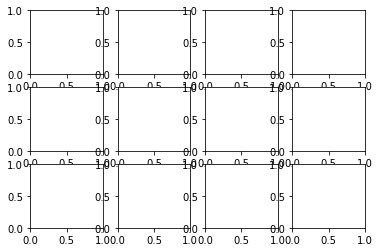

In [1]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

您应该能看到如下所示的内容，其中卷积获取鞋底的本质特征，实际上是将其看作所有鞋子的共同特征。



8. 练习
练习 1
尝试修改卷积。将卷积数从 32 更改为 16 或 64。这对准确率和训练时间有何影响？

练习 2
移除最终卷积。这对准确率或训练时间有何影响？

练习 3
添加更多卷积。这会带来什么影响？

练习 4
移除第一个卷积外的所有卷积。这会带来什么影响？对此进行实验。



## 9. 恭喜

您已构建了首个 CNN！